In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
# parameters
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                           shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                          shuffle=True, num_workers=2, drop_last=True)

0.0%

31.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

97.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw



112.7%

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [3]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1, 16, 5),
        nn.ReLU(),
        nn.Conv2d(16, 32, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )

    self.fc_layer = nn.Sequential(
        nn.Linear(64*3*3, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)
    out = self.fc_layer(out)
    return out

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [5]:
loss_arr = []

for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())

print("Learning is Finished")

tensor(2.2968, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2661, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1413, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0787, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0567, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0455, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0433, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0496, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<NllLossBackward0>)
Learning is Finished


In [6]:
correct = 0
total = 0

with torch.no_grad():
  for image, label in test_loader:
    x = image.to(device)
    y_ = label.to(device)

    output = model.forward(x)
    _, output_index = torch.max(output, 1)

    total += label.size(0)
    correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {} %".format(100*correct/total))

print(total)
print(correct)

Accuracy of Test Data: 98.81810760498047 %
9984
tensor(9866., device='cuda:0')


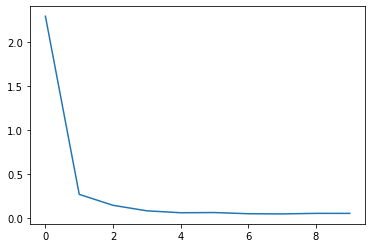

In [7]:
import matplotlib.pyplot as plt

plt.plot(loss_arr)
plt.show()

<br/>

#### 1. MNIST 학습 데이터 1개 이상 시각화

torch.Size([28, 28])


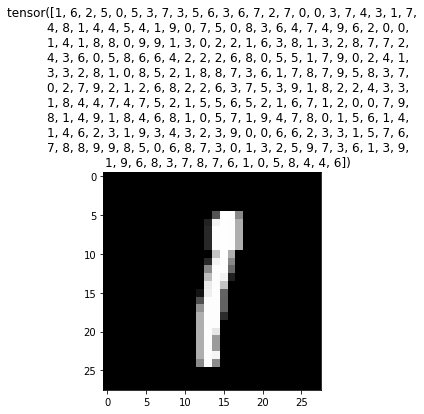

In [9]:
images, labels = next(iter(train_loader))
torch_image = torch.squeeze(images[0])
print(torch_image.shape)
image = torch_image.numpy()

plt.title(labels)
plt.imshow(image, 'gray')
plt.show()

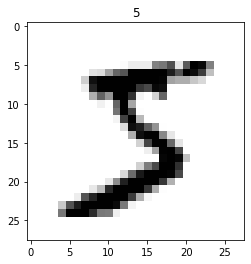

In [17]:
images, labels = mnist_train[0]
images.shape

plt.title(labels)
plt.imshow(images.reshape(28, 28), cmap='gist_yarg')
plt.show()

<br/>

#### 2. SGD 최적화 함수로 바꿔보기

- 거의 개선이 없다.

In [10]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1, 16, 5),
        nn.ReLU(),
        nn.Conv2d(16, 32, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )

    self.fc_layer = nn.Sequential(
        nn.Linear(64*3*3, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)
    out = self.fc_layer(out)
    return out

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
loss_arr = []

for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())

print("Learning is Finished")

tensor(2.3028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3055, device='cuda:0', grad_fn=<NllLossBackward0>)
Learning is Finished


In [12]:
correct = 0
total = 0

with torch.no_grad():
  for image, label in test_loader:
    x = image.to(device)
    y_ = label.to(device)

    output = model.forward(x)
    _, output_index = torch.max(output, 1)

    total += label.size(0)
    correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {} %".format(100*correct/total))

print(total)
print(correct)

Accuracy of Test Data: 8.944311141967773 %
9984
tensor(893., device='cuda:0')


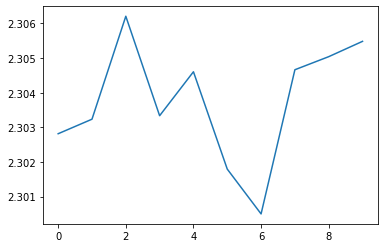

In [13]:
import matplotlib.pyplot as plt

plt.plot(loss_arr)
plt.show()

<br/>

#### 3. FashionMNIST 데이터셋을 대상으로 학습

In [18]:
f_mnist_train = dset.FashionMNIST("./", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)
f_mnist_test = dset.FashionMNIST("./", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

f_train_loader = torch.utils.data.DataLoader(f_mnist_train, batch_size=batch_size,
                                           shuffle=True, num_workers=2, drop_last=True)
f_test_loader = torch.utils.data.DataLoader(f_mnist_test, batch_size=batch_size,
                                          shuffle=True, num_workers=2, drop_last=True)

12.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

28.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

45.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

62.4%IOPub

Extracting ./FashionMNIST\raw\train-images-idx3-ubyte.gz to ./FashionMNIST\raw



100.6%


Extracting ./FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./FashionMNIST\raw



39.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting ./FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./FashionMNIST\raw



119.3%

Extracting ./FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./FashionMNIST\raw



In [20]:
images, labels = f_mnist_train[0]
images.shape

torch.Size([1, 28, 28])

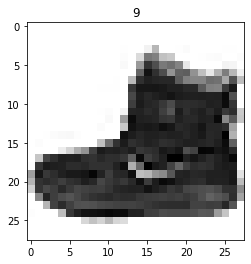

In [21]:
plt.title(labels)
plt.imshow(images.reshape(28, 28), cmap='gist_yarg')
plt.show()

In [22]:
# parameters
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [23]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1, 16, 5),
        nn.ReLU(),
        nn.Conv2d(16, 32, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )

    self.fc_layer = nn.Sequential(
        nn.Linear(64*3*3, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)
    out = self.fc_layer(out)
    return out

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
loss_arr = []

for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())

print("Learning is Finished")

tensor(2.3033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2715, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2550, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1079, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1117, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0866, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<NllLossBackward0>)
Learning is Finished


In [26]:
correct = 0
total = 0

with torch.no_grad():
  for image, label in test_loader:
    x = image.to(device)
    y_ = label.to(device)

    output = model.forward(x)
    _, output_index = torch.max(output, 1)

    total += label.size(0)
    correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {} %".format(100*correct/total))

print(total)
print(correct)

Accuracy of Test Data: 98.94831848144531 %
9984
tensor(9879., device='cuda:0')


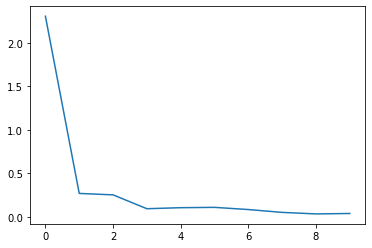

In [27]:
import matplotlib.pyplot as plt

plt.plot(loss_arr)
plt.show()

<br/>

#### 4. ResNet

In [ ]:
def conv_block_1(in_dim, out_dim, act_fn, stride=1):
    model = nn.Sequential(
        nn.Conv2d(in_dim, out_dim, kernel_size=1, stride=stride),
        act_fn,
    )

    return model

def conv_block_3(in_dim, out_dim, act_fn):
    model = nn.Sequential(
      nn.Conv2d(in_dim, out_dim, kernel_size=3, stride=1, padding=1),
      act_fn
    )

    return model

In [ ]:
class BottleNeck(nn.Module):
    def __init__(self, in_dim, mid_dim, out_dim, act_fn, down=False):
        super(BottleNeck, self).__init__()
        self.act_fn = act_fn
        self.down = down

        if self.down:
            self.layer = nn.Sequential(
              conv_block_1(in_dim, mid_dim, act_fn, 2),
              conv_block_3(mid_dim, mid_dim, act_fn),
              conv_block_1(in_dim, mid_dim, act_fn),
            )
            self.downsample = nn.Conv2d(in_dim, out_dim, 1, 2)
        else:
            self.layer = nn.Sequential(
                conv_block_1(in_dim, mid_dim, act_fn),
                conv_block_3(mid_dim, mid_dim, act_fn),
                conv_block_1(mid_dim, out_dim, act_fn),
            )

        self.dim_equalizer = nn.Conv2d(in_dim, out_dim, kernel_size=1)
        
    def forward(self, x):
        if self.down:
            downsample = self.sownsample(x)
            out = self.layer(x)
            out = out + downsample
        else:
            out = self.layer(x)
            if x.size() is not out.size():
                x = self.dim_equalizer(x)
            out = out + x
        return out

In [ ]:
class ResNet(nn.Module):
    def __init__(self, base_dim, num_classes=2):
        super(ResNet, self).__init__()
        self.act_fn = nn.ReLU()
        self.layer_1 = nn.Sequential(
            nn.Conv2d(3, base_dim, 7, 2, 3),
            nn.ReLU(),
            nn.MAXPool2d(3, 2, 1),
        )
        self.layer_2 = nn.Sequential(
            BottleNeck(base_dim, base_dim, base_dim*4, self.act_fn),
            BottleNeck(base_dim*4, base_dim, base_dim*4, self.act_fn),
            BottleNeck(base_dim*4, base_dim, base_dim*4, self.act_fn, down=True),
        )
        self.layer_3 = nn.Sequential(
            BottleNeck(base_dim*4, base_dim*2, base_dim*8, self.act_fn),
            BottleNeck(base_dim*8, base_dim*2, base_dim*8, self.act_fn),
            BottleNeck(base_dim*8, base_dim*2, base_dim*8, self.act_fn),
            BottleNeck(base_dim*8, base_dim*2, base_dim*8, self.act_fn, down=True),
        )
        self.layer_3 = nn.Sequential(
            BottleNeck(base_dim*4, base_dim*2, base_dim*8, self.act_fn),
            BottleNeck(base_dim*8, base_dim*2, base_dim*8, self.act_fn),
            BottleNeck(base_dim*8, base_dim*2, base_dim*8, self.act_fn),
            BottleNeck(base_dim*8, base_dim*2, base_dim*8, self.act_fn, down=True),
        )
        self.layer_4 = nn.Sequential(
            BottleNeck(base_dim*8, base_dim*4, base_dim*16, self.act_fn),
            BottleNeck(base_dim*16, base_dim*4, base_dim*16, self.act_fn),
            BottleNeck(base_dim*16, base_dim*4, base_dim*16, self.act_fn),
            BottleNeck(base_dim*16, base_dim*4, base_dim*16, self.act_fn),
            BottleNeck(base_dim*16, base_dim*4, base_dim*16, self.act_fn),
            BottleNeck(base_dim*16, base_dim*4, base_dim*16, self.act_fn, down=True),
        )
        self.layer_5 = nn.Sequential(
            BottleNeck(base_dim*16, base_dim*8, base_dim*32, self.act_fn),
            BottleNeck(base_dim*32, base_dim*8, base_dim*32, self.act_fn),
            BottleNeck(base_dim*32, base_dim*8, base_dim*32, self.act_fn),
        )
        self.avgpool = nn.AvgPool2d(7, 1)
        self.fc_layer = nn.Linear(base_dim*32, num_classes)
        
    def forward(self, x):
        out = self.layer_1(x)
        out = self.layer_2(out)
        out = self.layer_3(out)
        out = self.layer_4(out)
        out = self.layer_5(out)
        out = self.avgpool(out)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out

In [39]:
import os

# 기본 경로
base_dir = "archive"

train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

# 훈련에 사용되는 이미지 경로
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 이미지 경로
test_cats_dir = os.path.join(test_dir, "cats")
test_dogs_dir = os.path.join(test_dir, "dogs")
print(test_cats_dir)
print(test_dogs_dir)

archive\training_set\cats
archive\training_set\dogs
archive\test_set\cats
archive\test_set\dogs


In [40]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg']


In [41]:
print("Total Training cat images:", len(os.listdir(train_cats_dir)))
print("Total Training dog images:", len(os.listdir(train_dogs_dir)))
print()
print("Total Test cat images:", len(os.listdir(test_cats_dir)))
print("Total Test dog images:", len(os.listdir(test_dogs_dir)))

Total Training cat images: 4001
Total Training dog images: 4006

Total Test cat images: 1012
Total Test dog images: 1013


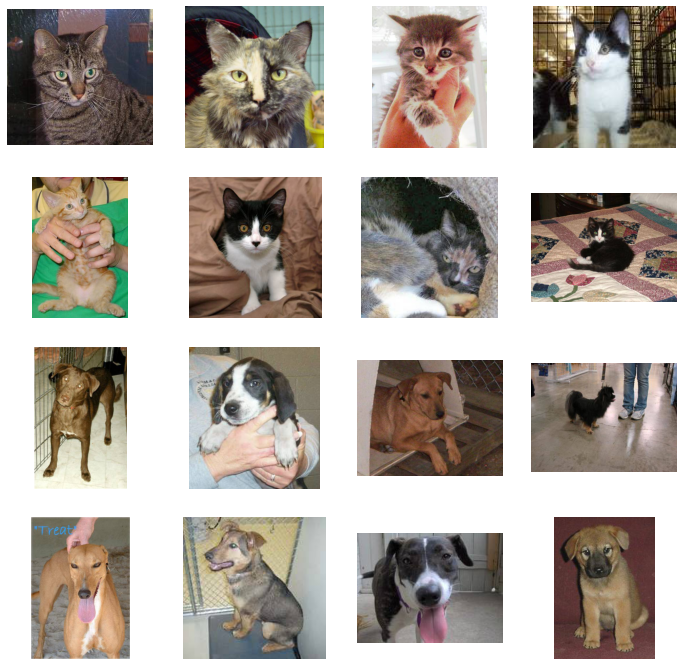

In [42]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
import os
import cv2
import time
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as T
from torchvision.utils import make_grid
from torchvision.models import resnet50

from sklearn.model_selection import train_test_split

from PIL import Image

import matplotlib.pyplot as plt

In [7]:
DIR_TRAIN = "./dogcat/train/train/"
DIR_TEST = "./dogcat/test1/test1/"

#### 개와 고양이 이미지 확인하기

In [8]:
imgs = os.listdir(DIR_TRAIN) 
test_imgs = os.listdir(DIR_TEST)

print(imgs[:5])
print(test_imgs[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg']


In [9]:
imgs = os.listdir(DIR_TRAIN) 
test_imgs = os.listdir(DIR_TEST)

print(imgs[:5])
print(test_imgs[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg']


In [10]:
# Exploring Dataset
classes = os.listdir(DIR_TRAIN)
print("Total Classes: ",len(classes))

class_to_int = {classes[i] : i for i in range(len(classes))}

Total Classes:  25000


In [11]:
def get_train_transform():
    return T.Compose([
        T.RandomHorizontalFlip(p=0.5),
        T.RandomRotation(15),
        T.RandomCrop(204),
        T.ToTensor(),
        T.Normalize((0, 0, 0),(1, 1, 1))
    ])
    
def get_val_transform():
    return T.Compose([
        T.ToTensor(),
        T.Normalize((0, 0, 0),(1, 1, 1))
    ])

In [12]:
class CatDogDataset(Dataset):
    
    def __init__(self, imgs, class_to_int, mode = "train", transforms = None):
        
        super().__init__()
        self.imgs = imgs
        self.class_to_int = class_to_int
        self.mode = mode
        self.transforms = transforms
        
    def __getitem__(self, idx):
        
        image_name = self.imgs[idx]
        
        ### Reading, converting and normalizing image
        #img = cv2.imread(DIR_TRAIN + image_name, cv2.IMREAD_COLOR)
        #img = cv2.resize(img, (224,224))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        #img /= 255.
        img = Image.open(DIR_TRAIN + image_name)
        img = img.resize((224, 224))
        
        if self.mode == "train" or self.mode == "val":
        
            ### Preparing class label
            label = self.class_to_int[image_name.split(".")[0]]
            label = torch.tensor(label, dtype = torch.float32)

            ### Apply Transforms on image
            img = self.transforms(img)

            return img, label
        
        elif self.mode == "test":
            
            ### Apply Transforms on image
            img = self.transforms(img)

            return img
            
        
    def __len__(self):
        return len(self.imgs)
    

In [13]:
train_imgs, val_imgs = train_test_split(imgs, test_size = 0.25)

In [15]:
train_dataset = CatDogDataset(train_imgs, class_to_int, mode = "train", transforms = get_train_transform())
val_dataset = CatDogDataset(val_imgs, class_to_int, mode = "val", transforms = get_val_transform())
test_dataset = CatDogDataset(test_imgs, class_to_int, mode = "test", transforms = get_val_transform())

train_data_loader = DataLoader(
    dataset = train_dataset,
    num_workers = 4,
    batch_size = 16,
    shuffle = True
)

val_data_loader = DataLoader(
    dataset = val_dataset,
    num_workers = 4,
    batch_size = 16,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_dataset,
    num_workers = 4,
    batch_size = 16,
    shuffle = True
)

In [ ]:
for images, labels in train_data_loader:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break
    

In [16]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [17]:
def accuracy(preds, trues):
    
    ### Converting preds to 0 or 1
    preds = [1 if preds[i] >= 0.5 else 0 for i in range(len(preds))]
    
    ### Calculating accuracy by comparing predictions with true labels
    acc = [1 if preds[i] == trues[i] else 0 for i in range(len(preds))]
    
    ### Summing over all correct predictions
    acc = np.sum(acc) / len(preds)
    
    return (acc * 100)

In [22]:
def train_one_epoch(train_data_loader):
    
    ### Local Parameters
    epoch_loss = []
    epoch_acc = []
    start_time = time.time()
    
    ###Iterating over data loader
    for images, labels in train_data_loader:
        
        #Loading images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 1)) # [N, 1] - to match with preds shape
        
        #Reseting Gradients
        optimizer.zero_grad()
        
        #Forward
        preds = model(images)
        
        #Calculating Loss
        _loss = criterion(preds, labels)
        loss = _loss.item()
        epoch_loss.append(loss)
        
        #Calculating Accuracy
        acc = accuracy(preds, labels)
        epoch_acc.append(acc)
        
        #Backward
        _loss.backward()
        optimizer.step()
    
    ###Overall Epoch Results
    end_time = time.time()
    total_time = end_time - start_time
    
    ###Acc and Loss
    epoch_loss = np.mean(epoch_loss)
    epoch_acc = np.mean(epoch_acc)
    
    ###Storing results to logs
    train_logs["loss"].append(epoch_loss)
    train_logs["accuracy"].append(epoch_acc)
    train_logs["time"].append(total_time)
        
    return epoch_loss, epoch_acc, total_time
        

In [23]:
def val_one_epoch(val_data_loader, best_val_acc):
    
    ### Local Parameters
    epoch_loss = []
    epoch_acc = []
    start_time = time.time()
    
    ###Iterating over data loader
    for images, labels in val_data_loader:
        
        #Loading images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 1)) # [N, 1] - to match with preds shape
        
        #Forward
        preds = model(images)
        
        #Calculating Loss
        _loss = criterion(preds, labels)
        loss = _loss.item()
        epoch_loss.append(loss)
        
        #Calculating Accuracy
        acc = accuracy(preds, labels)
        epoch_acc.append(acc)
    
    ###Overall Epoch Results
    end_time = time.time()
    total_time = end_time - start_time
    
    ###Acc and Loss
    epoch_loss = np.mean(epoch_loss)
    epoch_acc = np.mean(epoch_acc)
    
    ###Storing results to logs
    val_logs["loss"].append(epoch_loss)
    val_logs["accuracy"].append(epoch_acc)
    val_logs["time"].append(total_time)
    
    ###Saving best model
    if epoch_acc > best_val_acc:
        best_val_acc = epoch_acc
        torch.save(model.state_dict(),"resnet50_best.pth")
        
    return epoch_loss, epoch_acc, total_time, best_val_acc
        

In [19]:
model = resnet50(pretrained = True)

# Modifying Head - classifier

model.fc = nn.Sequential(
    nn.Linear(2048, 1, bias = True),
    nn.Sigmoid()
)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\ghpmc/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
30.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

74.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


In [24]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

# Learning Rate Scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.5)

#Loss Function
criterion = nn.BCELoss()

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "accuracy" : [], "time" : []}
val_logs = {"loss" : [], "accuracy" : [], "time" : []}

# Loading model to device
model.to(device)

# No of epochs 
epochs = 10

In [ ]:
best_val_acc = 0
for epoch in range(epochs):
    
    ###Training
    loss, acc, _time = train_one_epoch(train_data_loader)
    
    #Print Epoch Details
    print("\nTraining")
    print("Epoch {}".format(epoch+1))
    print("Loss : {}".format(round(loss, 4)))
    print("Acc : {}".format(round(acc, 4)))
    print("Time : {}".format(round(_time, 4)))
    
    ###Validation
    loss, acc, _time, best_val_acc = val_one_epoch(val_data_loader, best_val_acc)
    
    #Print Epoch Details
    print("\nValidating")
    print("Epoch {}".format(epoch+1))
    print("Loss : {}".format(round(loss, 4)))
    print("Acc : {}".format(round(acc, 4)))
    print("Time : {}".format(round(_time, 4)))

In [ ]:
### Plotting Results

#Loss
plt.title("Loss")
plt.plot(np.arange(1, 11, 1), train_logs["loss"], color = 'blue')
plt.plot(np.arange(1, 11, 1), val_logs["loss"], color = 'yellow')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#Accuracy
plt.title("Accuracy")
plt.plot(np.arange(1, 11, 1), train_logs["accuracy"], color = 'blue')
plt.plot(np.arange(1, 11, 1), val_logs["accuracy"], color = 'yellow')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()